In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [64]:
#Reading the dataset

df = pd.read_excel('Online Retail Data Set.xlsx')


In [65]:
# Display the first few rows of the DataFrame 'df'

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [66]:
# Display the data types of each column in the DataFrame 'df'

df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [67]:
# Generate descriptive statistics of numerical columns in the DataFrame

df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [68]:
# Retrieve the dimensions (number of rows and columns) of the DataFrame 

df.shape

(541909, 8)

In [69]:
# Remove duplicate rows from the DataFrame 'df'

df = df.drop_duplicates()

In [70]:
df.shape

(536641, 8)

In [71]:
# Calculate the percentage of missing values in each column

missing_values = df.isnull().sum()
total_values = df.shape[0]  
missing_percentage = (missing_values / total_values) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.270945
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     25.163377
Country         0.000000
dtype: float64


In [72]:
# Remove rows with any missing values (NaNs) from the DataFrame 'df'

df = df.dropna()

In [73]:
df.shape

(401604, 8)

In [74]:
# Extract month, day, year and time names from the 'InvoiceDate' column and creating new columns

df['Month'] = df['InvoiceDate'].dt.month_name()
df['Day'] = df['InvoiceDate'].dt.day_name()
df['Year']= df['InvoiceDate'].dt.year
df['Time'] = df['InvoiceDate'].dt.time

In [75]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,2010,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00


In [76]:
df.shape

(401604, 12)

In [77]:
df['CustomerID'] = df['CustomerID'].astype(str)

In [78]:
df['Year'] = df['Year'].astype(str)

EDA:

<Axes: ylabel='UnitPrice'>

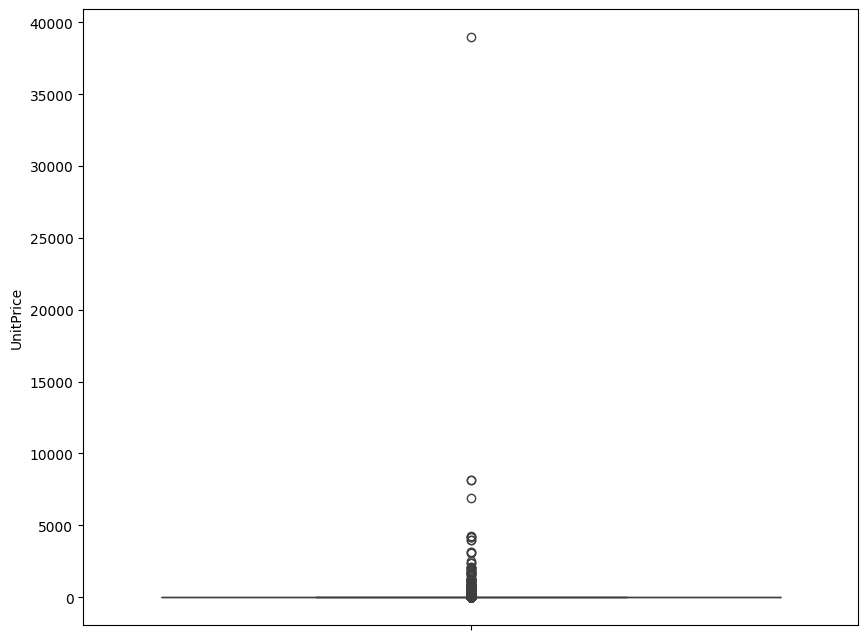

In [79]:
#Box plot for checking Unit Price Distribution
sns.boxplot(y = 'UnitPrice', data=df) 

<Axes: ylabel='Quantity'>

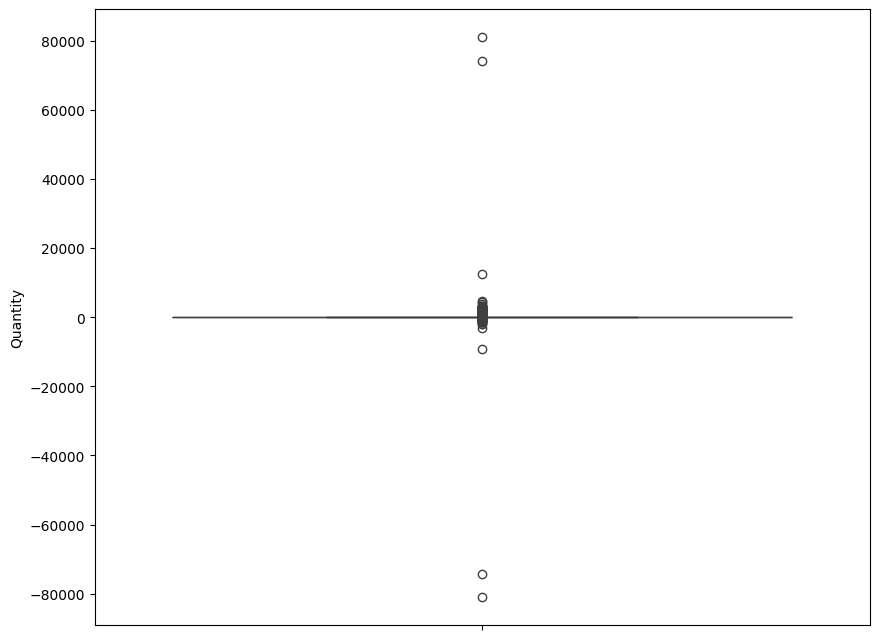

In [80]:
#Box plot for checking Unit Price Distribution
sns.boxplot(y = 'Quantity', data=df)

In [81]:
# Filter the DataFrame to select rows where the 'Quantity' column is less than 0

df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,December,Wednesday,2010,09:41:00
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,December,Wednesday,2010,09:49:00
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,December,Wednesday,2010,10:24:00
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,December,Wednesday,2010,10:24:00
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,December,Wednesday,2010,10:24:00
...,...,...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,December,Friday,2011,09:57:00
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,December,Friday,2011,10:28:00
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,December,Friday,2011,11:57:00
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,December,Friday,2011,11:58:00


In [82]:
negative_purchases = df[df['Quantity'] < 0]

In [83]:
df = df[df['Quantity']>0]

In [84]:
# Calculate the minimum value in the 'Quantity' column

df['Quantity'].min()

1

In [85]:
# Group the DataFrame by 'Description', calculate the sum of 'Quantity' for each group,
# and reset the index to make 'Description' a regular column

mostSold = df.groupby('Description')['Quantity'].sum().reset_index()

# Sort the DataFrame by the sum of 'Quantity' in descending order,
# and select the top 5 rows with the highest quantities sold

mostSold = mostSold.sort_values('Quantity', ascending=False).head(5)

mostSold

,Description,Quantity
2319,"PAPER CRAFT , LITTLE BIRDIE",80995
1992,MEDIUM CERAMIC TOP STORAGE JAR,77916
3786,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
1762,JUMBO BAG RED RETROSPOT,46078
3698,WHITE HANGING HEART T-LIGHT HOLDER,36706


C:\Users\User\AppData\Local\Temp\ipykernel_15540\2783638416.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = mostSold, palette = Palette)
C:\Users\User\AppData\Local\Temp\ipykernel_15540\2783638416.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = mostSold, palette = Palette)


Text(0, 0.5, 'Product Description')

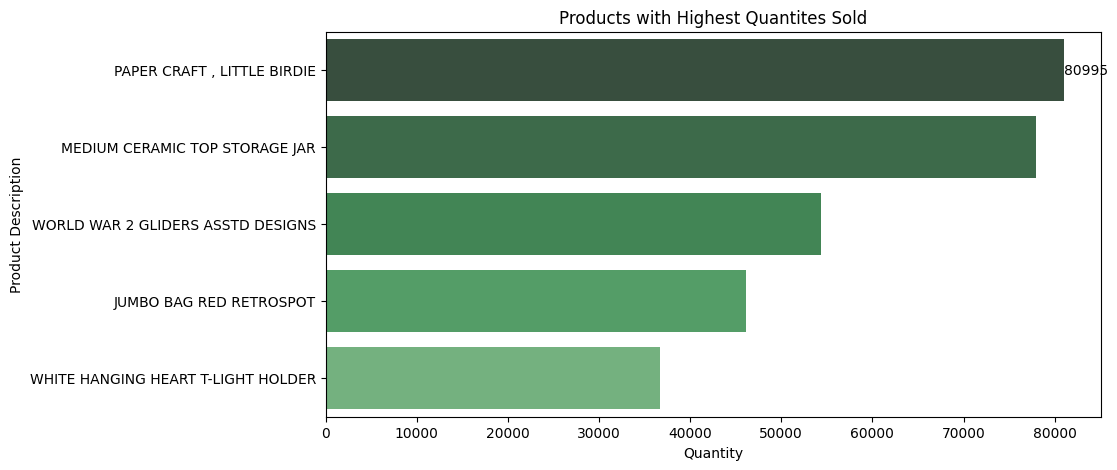

In [86]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Greens_d')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Description' , x= 'Quantity' , data = mostSold, palette = Palette)
#Data labels
ax.bar_label(ax.containers[0])
#Setting Title
plt.title('Products with Highest Quantites Sold')
plt.ylabel('Product Description')

In [87]:
# Count the occurrences of each country in the 'Country' column

country = df['Country'].value_counts().reset_index(drop = False).head(10)
country.columns = ['Country','Counts'] 

C:\Users\User\AppData\Local\Temp\ipykernel_15540\3088081797.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(x= 'Country', y = 'Counts' , data = country, palette = 'coolwarm')


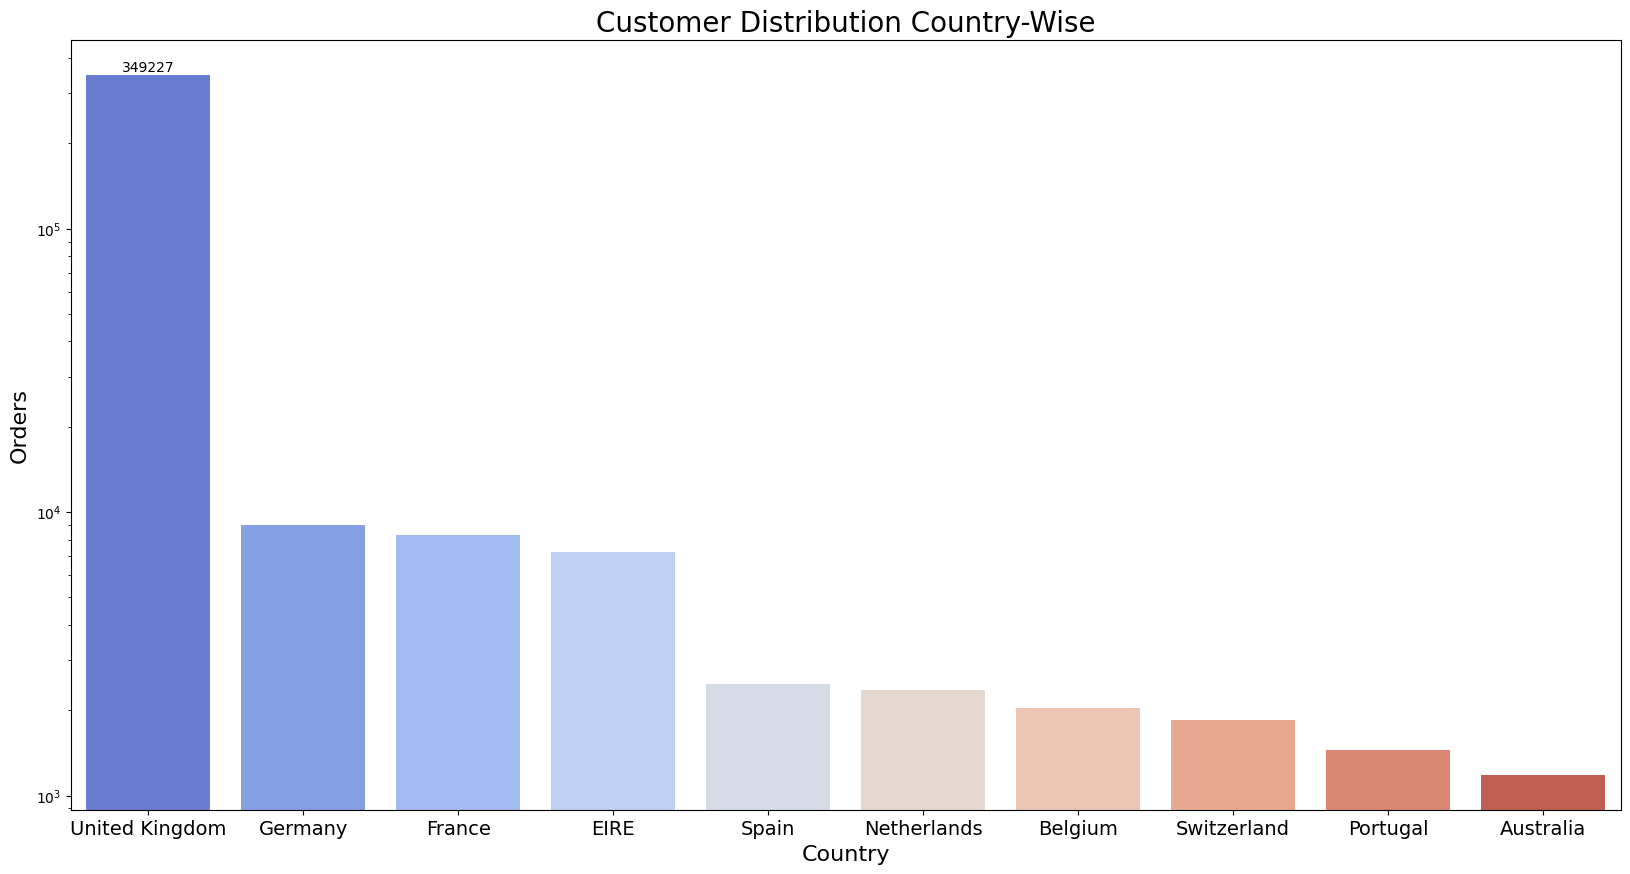

In [88]:
plt.figure(figsize = (20,10))
ax =sns.barplot(x= 'Country', y = 'Counts' , data = country, palette = 'coolwarm')
ax.bar_label(ax.containers[0])
plt.title("Customer Distribution Country-Wise",fontsize=20)
plt.ylabel("Orders",fontsize = 16)
plt.xlabel('Country',fontsize = 16)
plt.xticks(fontsize = 14)
plt.yscale('log')

In [89]:
# Group the DataFrame by 'Day', count the occurrences of 'InvoiceNo' for each group

sale = df.groupby('Day').count()[['InvoiceNo']].reset_index()
sale.columns = ['Day','Sales']
sale.sort_values(by='Day')

,Day,Sales
0,Friday,54231
1,Monday,64237
2,Sunday,61214
3,Thursday,79260
4,Tuesday,65747
5,Wednesday,68043


C:\Users\User\AppData\Local\Temp\ipykernel_15540\1617210055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax =sns.barplot(y = 'Day' , x= 'Sales' , data = sale, palette = Palette)


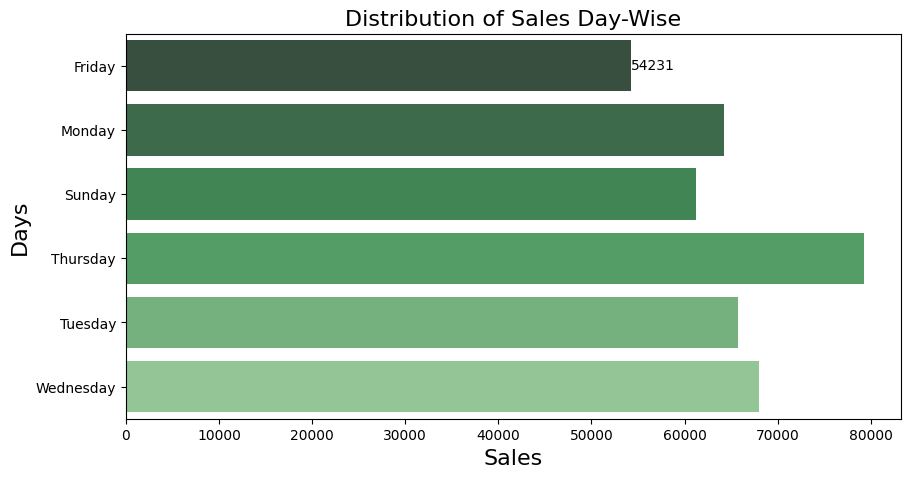

In [90]:
#Choosing Palette and reverse it
Palette = sns.color_palette('Greens_d')
Palette.reverse()
plt.figure(figsize = (10,5))
#Visualizing
ax =sns.barplot(y = 'Day' , x= 'Sales' , data = sale, palette = Palette)
#Data labels
ax.bar_label(ax.containers[0])
#Setting Title
plt.title('Distribution of Sales Day-Wise',fontsize = 16)
plt.ylabel('Days',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

RFM:

In [91]:
# Calculate the total amount spent for each transaction by multiplying 'Quantity' and 'UnitPrice'
# Group the DataFrame by 'CustomerID', calculate the sum of 'TotalAmount' for each group

df['TotalAmount'] = df['Quantity']*df['UnitPrice']
totalAmount = df.groupby('CustomerID')['TotalAmount'].sum()
totalAmount = totalAmount.reset_index()
totalAmount.head()

,CustomerID,TotalAmount
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [92]:
# Group the DataFrame by 'CustomerID', count the occurrences of 'InvoiceNo' for each group,
# effectively calculating the frequency of transactions for each customer

freq = df.groupby('CustomerID')['InvoiceNo'].count()
freq = freq.reset_index()
freq.columns = ['CustomerID', 'Frequency']
freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [93]:
# Merge the 'totalAmount' and 'freq' DataFrames based on the 'CustomerID' column 

stats = pd.merge(totalAmount, freq, on='CustomerID', how='inner')
stats.head()

,CustomerID,TotalAmount,Frequency
0,12346.0,77183.60,1
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [94]:
# Convert the 'InvoiceDate' column to datetime format using the specified format

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [95]:
lastDate = max(df['InvoiceDate'])
lastDate

Timestamp('2011-12-09 12:50:00')

In [96]:
df['Difference'] = lastDate - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,TotalAmount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,20.34,373 days 04:24:00


In [97]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Day,Year,Time,TotalAmount,Difference
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,December,Wednesday,2010,08:26:00,20.34,373 days 04:24:00


In [98]:
diff = df.groupby('CustomerID')['Difference'].min()
diff = diff.reset_index()
diff.head()

,CustomerID,Difference
0,12346.0,325 days 02:49:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [99]:
diff['Difference'] = diff['Difference'].dt.days
diff.head()

,CustomerID,Difference
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [100]:
stats = pd.merge(stats, diff, on='CustomerID', how='inner')
stats.columns = ['CustomerID', 'TotalAmount', 'Frequency', 'Recency']
stats.head()

,CustomerID,TotalAmount,Frequency,Recency
0,12346.0,77183.60,1,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


Text(0.5, 0, 'Attributes')

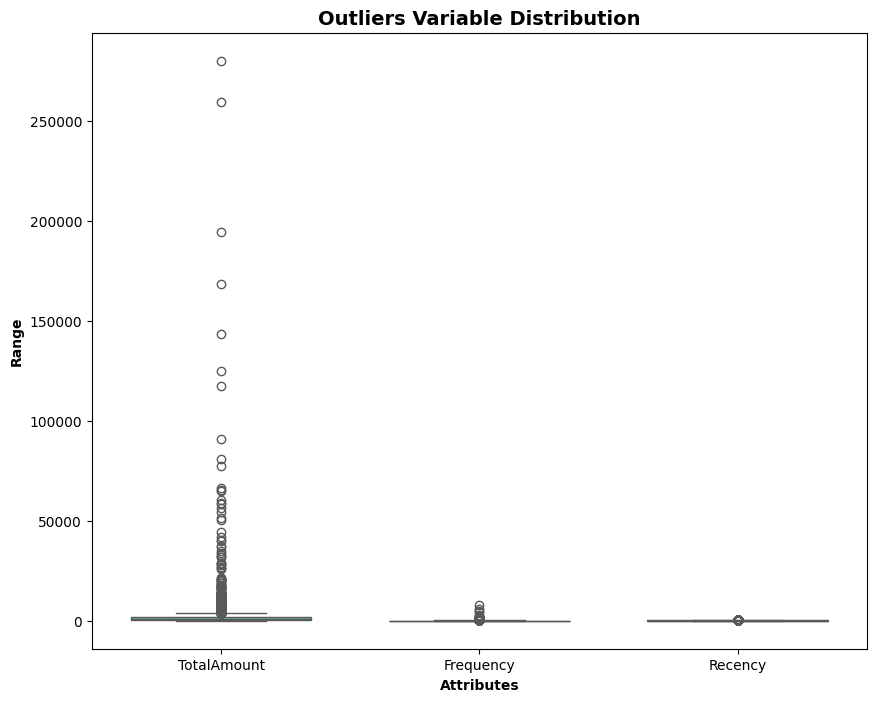

In [101]:
attributes = ['TotalAmount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = stats[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [102]:
# Removing (statistical) outliers for Amount
Q1 = stats.TotalAmount.quantile(0.05)
Q3 = stats.TotalAmount.quantile(0.95)
IQR = Q3 - Q1
stats = stats[(stats.TotalAmount >= Q1 - 1.5*IQR) & (stats.TotalAmount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = stats.Recency.quantile(0.05)
Q3 = stats.Recency.quantile(0.95)
IQR = Q3 - Q1
stats = stats[(stats.Recency >= Q1 - 1.5*IQR) & (stats.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = stats.Frequency.quantile(0.05)
Q3 = stats.Frequency.quantile(0.95)
IQR = Q3 - Q1
stats = stats[(stats.Frequency >= Q1 - 1.5*IQR) & (stats.Frequency <= Q3 + 1.5*IQR)]

In [103]:
statScale = stats[['TotalAmount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
statScale_scaled = scaler.fit_transform(statScale)
statScale_scaled.shape

(4258, 3)

In [104]:
statScale_scaled = pd.DataFrame(statScale_scaled)
statScale_scaled.columns = ['TotalAmount', 'Frequency', 'Recency']
statScale_scaled.head()

,TotalAmount,Frequency,Recency
0,1.660541,1.082775,-0.917707
1,0.267485,-0.456323,-0.189082
2,0.245481,-0.028230,-0.748027
3,-0.543503,-0.599021,2.156491
4,0.660439,0.094083,-0.578347


K Means:

In [105]:
# Initialize a K-means clustering model with 4 clusters and a maximum of 50 iterations

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(statScale_scaled)

KMeans(max_iter=50, n_clusters=4)

In [106]:
kmeans.labels_

array([1, 0, 0, ..., 0, 3, 0])

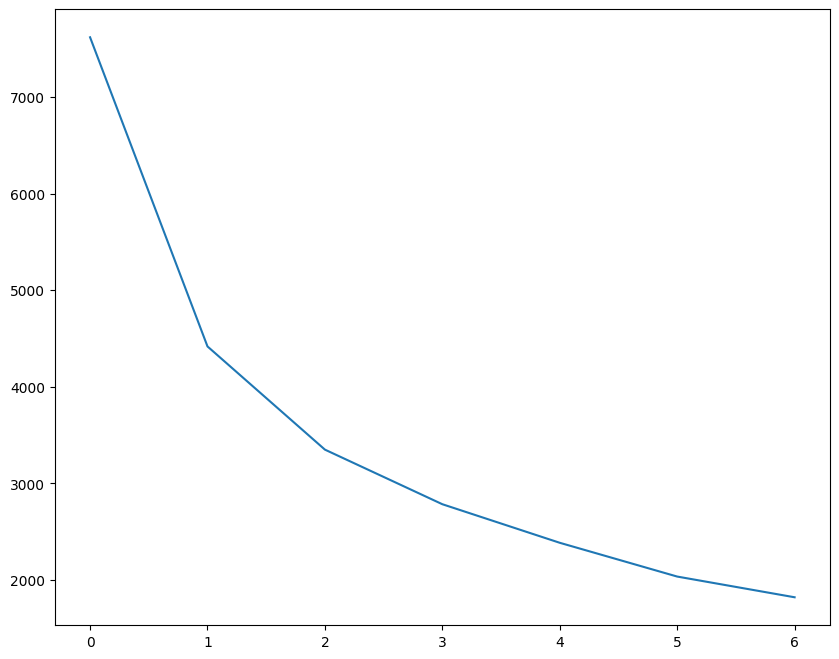

In [107]:
# Iterate over each number of clusters
# Initialize a K-means clustering model with the current number of clusters and a maximum of 50 iterations

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(statScale_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [108]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    

    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(statScale_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(statScale_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4029666122585707
For n_clusters=3, the silhouette score is 0.5096817426576096
For n_clusters=4, the silhouette score is 0.4859647813286772
For n_clusters=5, the silhouette score is 0.41393675910746264
For n_clusters=6, the silhouette score is 0.4402404614305869
For n_clusters=7, the silhouette score is 0.4177349682016921
For n_clusters=8, the silhouette score is 0.4083790240989118


In [109]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(statScale_scaled)

KMeans(max_iter=50, n_clusters=3)

In [110]:
kmeans.labels_

array([1, 0, 0, ..., 0, 1, 0])

In [111]:
stats['Cluster_Id'] = kmeans.labels_
stats.head()

,CustomerID,TotalAmount,Frequency,Recency,Cluster_Id
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,2
5,12352.0,2506.04,85,35,0


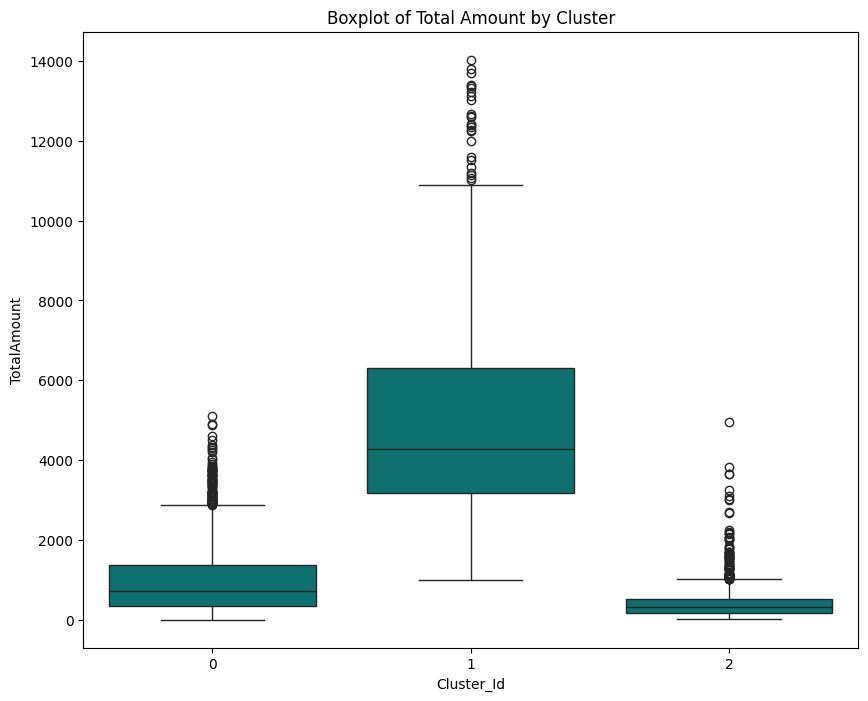

In [112]:
sns.boxplot(x='Cluster_Id', y='TotalAmount', data=stats, color='teal')

plt.title("Boxplot of Total Amount by Cluster")
plt.show()

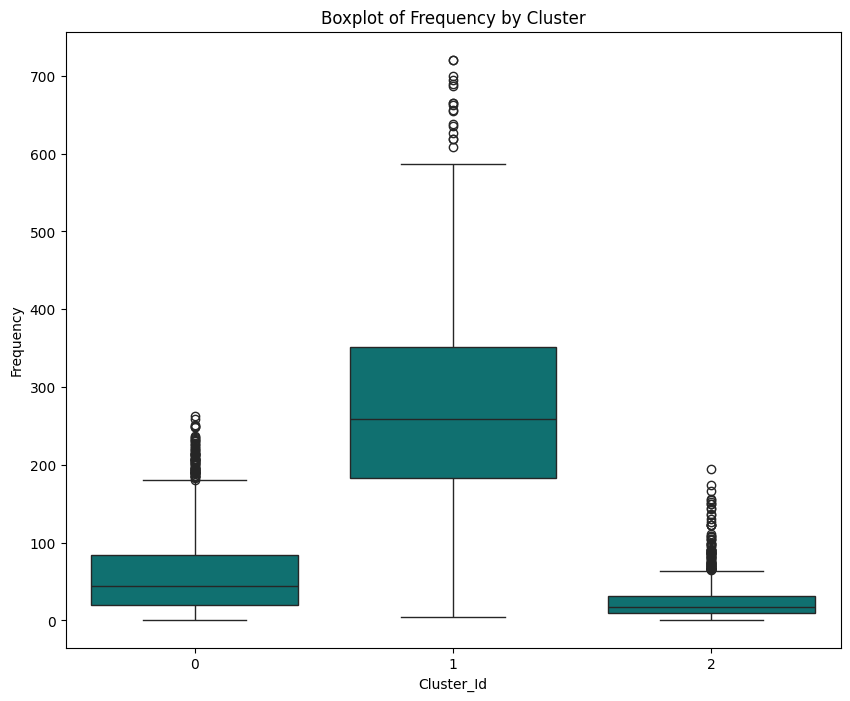

In [113]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=stats, color='teal')

plt.title("Boxplot of Frequency by Cluster")
plt.show()

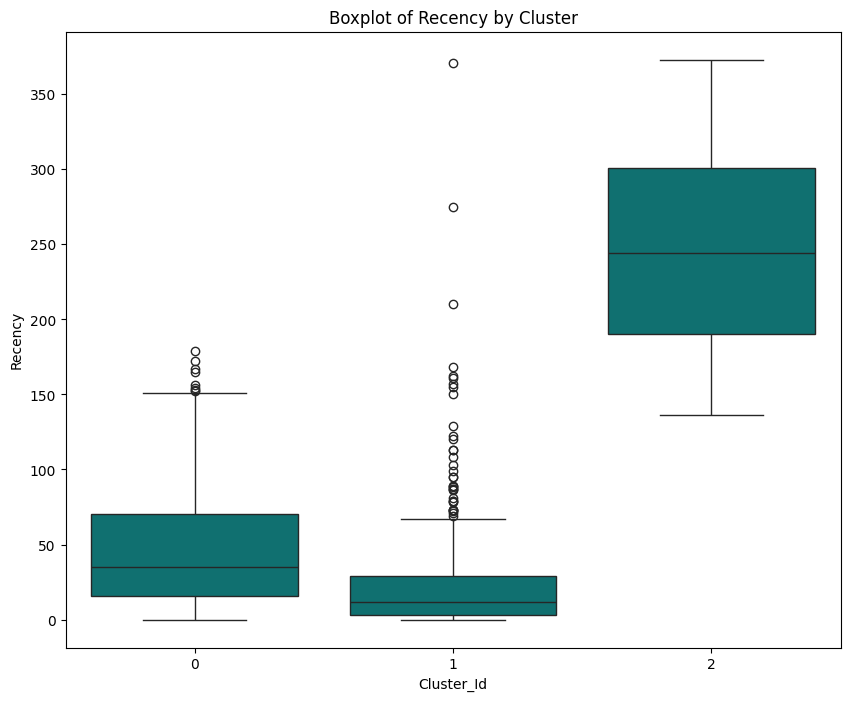

In [114]:
sns.boxplot(x='Cluster_Id', y='Recency', data=stats, color='teal')

plt.title("Boxplot of Recency by Cluster")
plt.show()

Key Findings:

Customers with Cluster ID 2 are the highest spenders.

Customers with Cluster ID 2 are the most frequent buyers.

Customers with Cluster ID 1 are the most recent buyers.